In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter
import mplfinance as mpf

In [3]:
df_raw = pd.read_csv('yte_st_top10_icd.csv')
df_raw['NGAYVAO'] = pd.to_datetime(df_raw['NGAYVAO'])
df_raw = df_raw.sort_values(by='NGAYVAO')
df_raw

C:\Users\PC\AppData\Local\Temp\ipykernel_23672\663686998.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_raw['NGAYVAO'] = pd.to_datetime(df_raw['NGAYVAO'])


,NGAYVAO,SO_LUONG,E11,E11_9,I10,J01,J02,J06_9,K21,K21_0,J20,M25_5,M54_5,R10_4,OTHER
1095,2022-01-01,1201,21,145,246,5,13,3,6,1,15,10,10,9,717
447,2022-01-02,819,37,74,122,6,23,0,4,2,9,2,14,5,521
1267,2022-01-03,1651,42,147,291,7,23,1,10,1,39,13,33,25,1019
446,2022-01-04,6268,369,186,1741,83,298,20,79,2,161,58,43,30,3198
608,2022-01-05,4407,212,134,1081,67,257,5,65,1,123,57,27,18,2360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2025-06-17,6578,302,272,1060,62,227,43,134,108,194,88,101,85,3902
1196,2025-06-18,5754,228,223,868,70,200,41,113,123,154,88,89,106,3451
1195,2025-06-19,6027,274,233,890,78,192,32,152,113,167,69,90,96,3641
106,2025-06-20,6849,346,250,1075,107,184,44,146,154,171,80,92,81,4119


- E11	Bệnh đái tháo đường không phụ thuộc insuline
- E11.9	Bệnh đái tháo đường không phụ thuộc insuline (Chưa có biến chứng)
- I10	Bệnh lý tăng huyết áp
- J01	Viêm xoang cấp
- J02	Viêm họng cấp
- J06.9	Nhiễm trùng đường hô hấp trên cấp, không phân loại
- K21	Bệnh trào ngược dạ dày - thực quản
- K21.0	Bệnh trào ngược dạ dày - thực quản với viêm thực quản
- J20	Viêm phế quản cấp
- M25.5	Đau khớp
- M54.5	Đau cột sống thắt lưng
- R10.4	Đau bụng không xác định và đau bụng khác

In [9]:
print(df_raw[['NGAYVAO', 'SO_LUONG', 'E11', 'E11_9', 'I10']].head(4).to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
NGAYVAO & SO_LUONG & E11 & E11_9 & I10 \\
\midrule
2022-01-01 00:00:00 & 1201 & 21 & 145 & 246 \\
2022-01-02 00:00:00 & 819 & 37 & 74 & 122 \\
2022-01-03 00:00:00 & 1651 & 42 & 147 & 291 \\
2022-01-04 00:00:00 & 6268 & 369 & 186 & 1741 \\
\bottomrule
\end{tabular}



In [11]:
df_raw.columns

Index(['NGAYVAO', 'SO_LUONG', 'E11', 'E11_9', 'I10', 'J01', 'J02', 'J06_9',
       'K21', 'K21_0', 'J20', 'M25_5', 'M54_5', 'R10_4', 'OTHER'],
      dtype='object')

In [14]:
df = df_raw.copy()

summary_stats = {
    " ": [
        "Mean",
        "Min",
        "Q1",
        "Median",
        "Q3",
        "Max",
        "Mode",
        "Var",
        "SD",
        "CV",
        "IQR"
    ]
}

quantitative_cols = [
    'SO_LUONG',
    'E11',
    'E11_9',
    'I10',
    'J01',
]

def create_summary_df(df, quantitative_cols):
    for col in quantitative_cols:
        data = df[col]
        mean_val = data.mean()
        std_val = data.std()
        mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
        variance_val = data.var()
        cv_val = std_val / mean_val if mean_val != 0 else np.nan

        summary_stats[col] = [
            mean_val,
            data.min(),
            data.quantile(0.25),
            data.median(),
            data.quantile(0.75),
            data.max(),
            mode_val,
            variance_val,
            std_val,
            cv_val,
            data.quantile(0.75) - data.quantile(0.25)
        ]

    formatted_summary_df = pd.DataFrame(summary_stats).copy()

    for col in formatted_summary_df.columns[1:]:  # Skip "Thông số thống kê"
        formatted_summary_df[col] = formatted_summary_df[col].apply(lambda x: f'{x:,.4f}' if isinstance(x, (int, float)) else x)

    return formatted_summary_df

formatted_summary_df = create_summary_df(df, quantitative_cols)
formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)
formatted_summary_df

C:\Users\PC\AppData\Local\Temp\ipykernel_23672\3367826391.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)


,,SO_LUONG,E11,E11_9,I10,J01
0,Mean,"5,637.0662",199.8052,223.5213,883.0639,75.2634
1,Min,293,0,1,17,0
2,Q1,"2,869",38,171,397,13
3,Median,"6,572.5",239,209,"1,014",92.5
4,Q3,"7,384.25",292.25,265,"1,187.25",113
5,Max,"11,929",644,686,"2,362",174
6,Mode,"6,623",28,195,"1,066",5
7,Var,"6,138,540.7312","17,225.6739","6,730.8812","192,124.2856","2,359.326"
8,SD,"2,477.6079",131.2466,82.0419,438.3198,48.5729
9,CV,0.4395,0.6569,0.367,0.4964,0.6454


In [15]:
print(formatted_summary_df.to_latex(index=False, escape=False, float_format="%.4f"))

\begin{tabular}{llllll}
\toprule
  & SO_LUONG & E11 & E11_9 & I10 & J01 \\
\midrule
Mean & 5,637.0662 & 199.8052 & 223.5213 & 883.0639 & 75.2634 \\
Min & 293 & 0 & 1 & 17 & 0 \\
Q1 & 2,869 & 38 & 171 & 397 & 13 \\
Median & 6,572.5 & 239 & 209 & 1,014 & 92.5 \\
Q3 & 7,384.25 & 292.25 & 265 & 1,187.25 & 113 \\
Max & 11,929 & 644 & 686 & 2,362 & 174 \\
Mode & 6,623 & 28 & 195 & 1,066 & 5 \\
Var & 6,138,540.7312 & 17,225.6739 & 6,730.8812 & 192,124.2856 & 2,359.326 \\
SD & 2,477.6079 & 131.2466 & 82.0419 & 438.3198 & 48.5729 \\
CV & 0.4395 & 0.6569 & 0.367 & 0.4964 & 0.6454 \\
IQR & 4,515.25 & 254.25 & 94 & 790.25 & 100 \\
\bottomrule
\end{tabular}



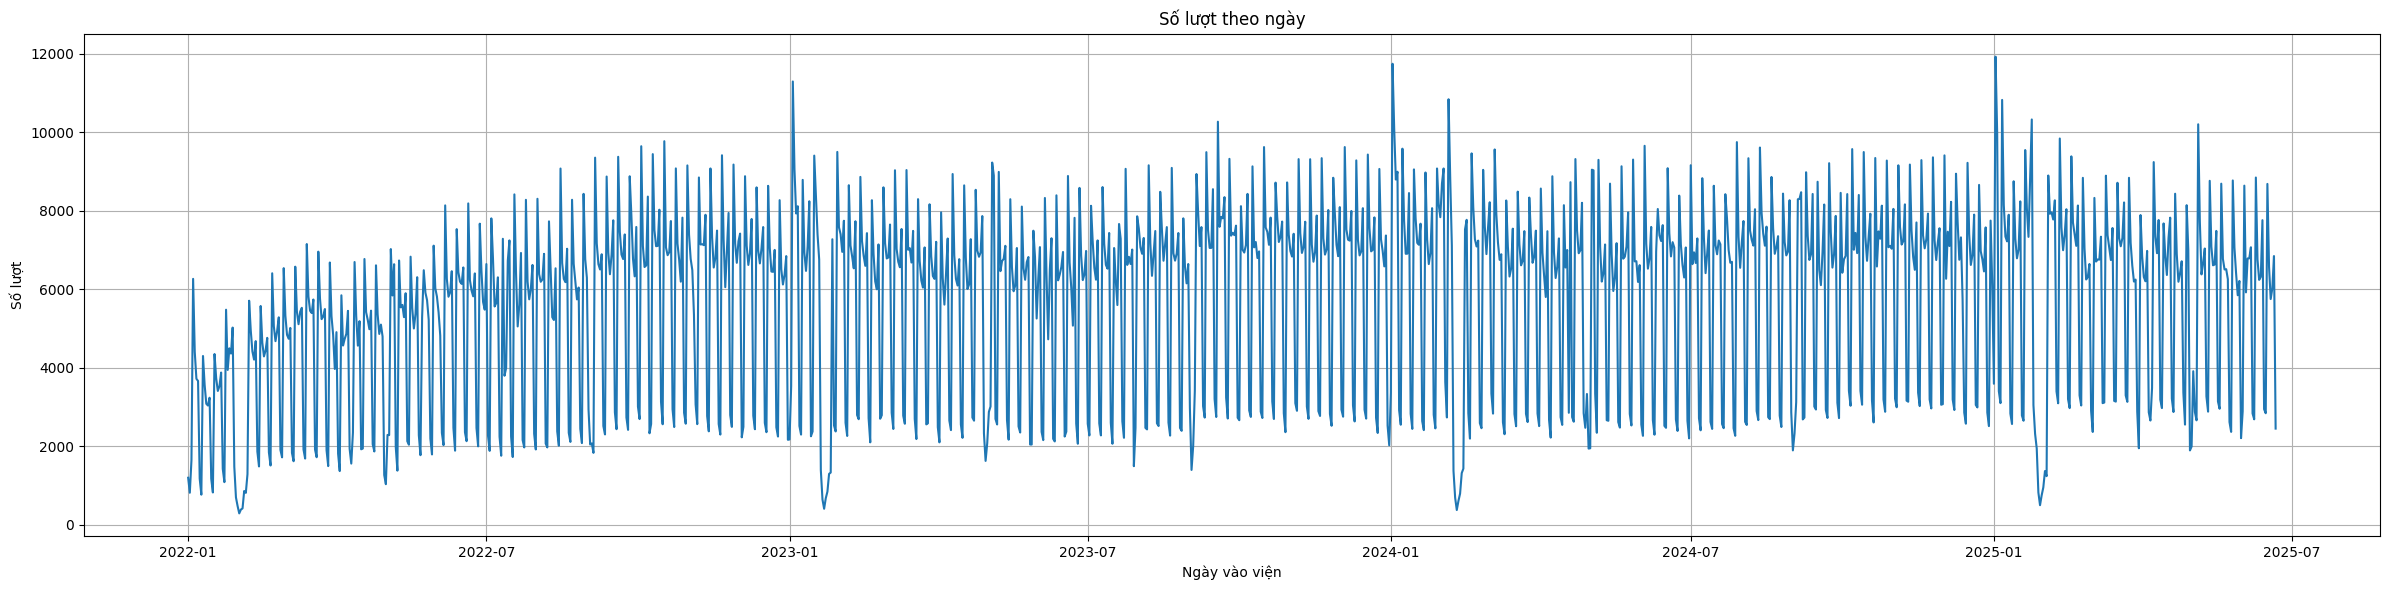

In [5]:
def plot_time_series(df, x_col, y_col, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(24, 6))
    plt.plot(df[x_col], df[y_col], linestyle='-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_time_series(df_raw, 'NGAYVAO', 'SO_LUONG', title='Số lượt theo ngày', xlabel='Ngày vào viện', ylabel='Số lượt')

<Axes: title={'center': '7-day Moving Average of Daily Visits'}, xlabel='NGAYVAO'>

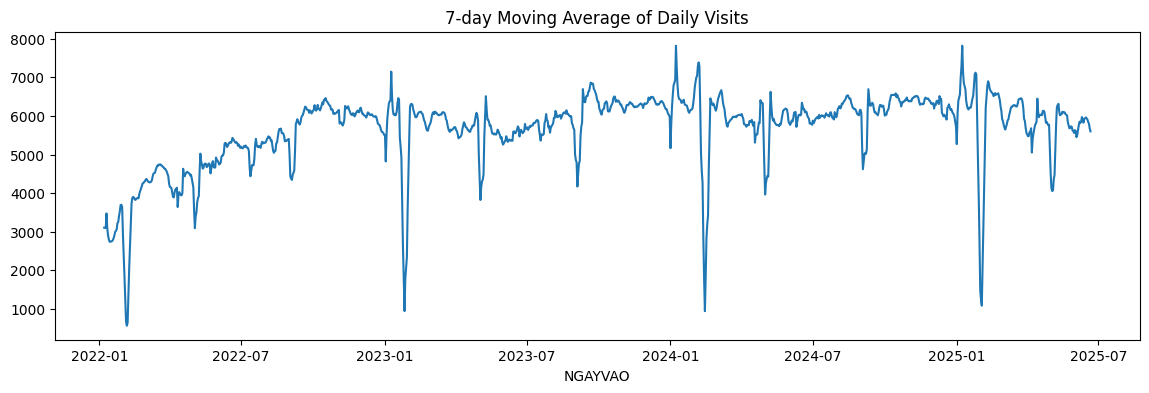

In [6]:
df_daily = df_raw.groupby(df_raw["NGAYVAO"].dt.date)["SO_LUONG"].sum()
df_daily.rolling(7).mean().plot(figsize=(14,4), title="7-day Moving Average of Daily Visits")


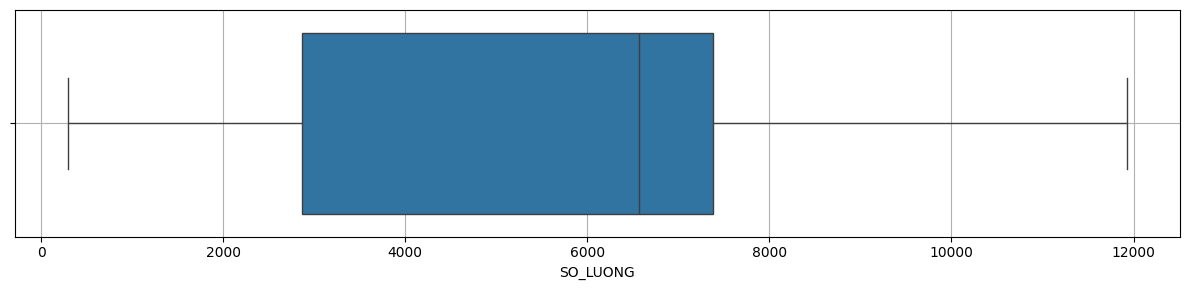

In [7]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df_raw['SO_LUONG'])
plt.xlabel('SO_LUONG')
plt.grid(True)
plt.tight_layout()
plt.show()
